# HISTORY

#### INFORMATION

* 0 - No DR
* 1 - Mild
* 2 - Moderate
* 3 - Severe
* 4 - Proliferative DR

# PACKAGES AND LIBRARIES

In [1]:
#GENERAL
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
import itertools
#PATH PROCESS
import os
import os.path
from pathlib import Path
import glob
#IMAGE PROCESS
from PIL import Image
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.preprocessing import image
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
from scipy.ndimage.filters import convolve
from skimage import data, io, filters
import skimage
from skimage.morphology import convex_hull_image, erosion
from skimage.morphology import square
#SCALER & TRANSFORMATION
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from keras import regularizers
from sklearn.preprocessing import LabelEncoder
#ACCURACY CONTROL
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
#OPTIMIZER
from keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
#MODEL LAYERS
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D,BatchNormalization,\
                        Permute, TimeDistributed, Bidirectional,GRU, SimpleRNN, LSTM, GlobalAveragePooling2D, SeparableConv2D, ZeroPadding2D, Convolution2D, ZeroPadding2D
from keras import models
from keras import layers
import tensorflow as tf
from keras.applications import VGG16,VGG19,inception_v3
from keras import backend as K
from keras.utils import plot_model
from keras.models import load_model
import keras
#SKLEARN CLASSIFIER
from xgboost import XGBClassifier, XGBRegressor
from lightgbm import LGBMClassifier, LGBMRegressor
from catboost import CatBoostClassifier, CatBoostRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import ElasticNetCV
#IGNORING WARNINGS
from warnings import filterwarnings
filterwarnings("ignore",category=DeprecationWarning)
filterwarnings("ignore", category=FutureWarning) 
filterwarnings("ignore", category=UserWarning)

# PATH PROCESS

#### MAIN PATH

In [2]:
Main_Non_DR = Path("../input/diabetic-retinopathy-resized-arranged/0")

#### NON DR PATH

In [3]:
Non_DR_Path = list(Main_Non_DR.glob(r"*.jpeg"))

#### TO SERIES

In [4]:
DR_Path_Series = pd.Series(Non_DR_Path,name="JPEG").astype(str)

In [5]:
print(DR_Path_Series.head(-1))

0        ../input/diabetic-retinopathy-resized-arranged...
1        ../input/diabetic-retinopathy-resized-arranged...
2        ../input/diabetic-retinopathy-resized-arranged...
3        ../input/diabetic-retinopathy-resized-arranged...
4        ../input/diabetic-retinopathy-resized-arranged...
                               ...                        
25804    ../input/diabetic-retinopathy-resized-arranged...
25805    ../input/diabetic-retinopathy-resized-arranged...
25806    ../input/diabetic-retinopathy-resized-arranged...
25807    ../input/diabetic-retinopathy-resized-arranged...
25808    ../input/diabetic-retinopathy-resized-arranged...
Name: JPEG, Length: 25809, dtype: object


# VISUALIZATION

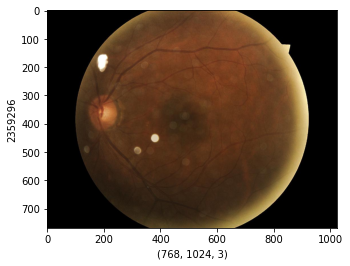

In [6]:
Example_IMG = DR_Path_Series[23421]
Reading_IMG = cv2.imread(Example_IMG)
Reading_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
plt.xlabel(Reading_IMG.shape)
plt.ylabel(Reading_IMG.size)
plt.imshow(Reading_IMG)

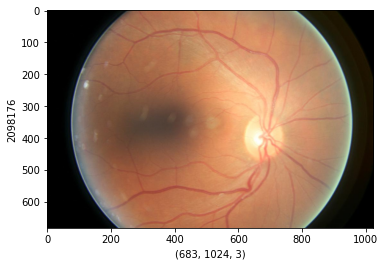

In [7]:
Example_IMG = DR_Path_Series[5]
Reading_IMG = cv2.imread(Example_IMG)
Reading_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
plt.xlabel(Reading_IMG.shape)
plt.ylabel(Reading_IMG.size)
plt.imshow(Reading_IMG)

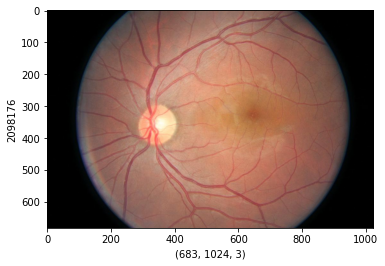

In [8]:
Example_IMG = DR_Path_Series[1115]
Reading_IMG = cv2.imread(Example_IMG)
Reading_IMG = cv2.cvtColor(Reading_IMG,cv2.COLOR_BGR2RGB)
plt.xlabel(Reading_IMG.shape)
plt.ylabel(Reading_IMG.size)
plt.imshow(Reading_IMG)

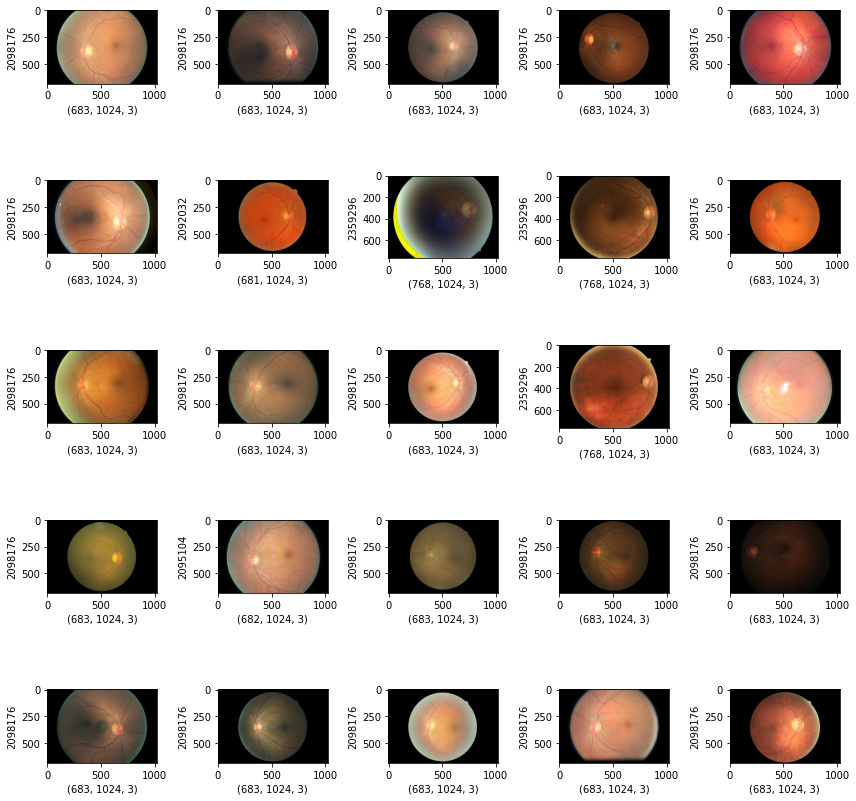

In [9]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    IMG_X = cv2.imread(DR_Path_Series[i])
    IMG_X = cv2.cvtColor(IMG_X,cv2.COLOR_BGR2RGB)
    ax.set_xlabel(IMG_X.shape)
    ax.set_ylabel(IMG_X.size)
    ax.imshow(IMG_X)
plt.tight_layout()
plt.show()

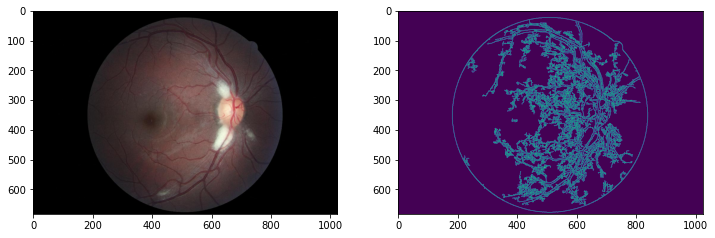

In [10]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[4352])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
Canny_Image = cv2.Canny(Example_Image,10,100)

axis[0].imshow(Example_Image)
axis[1].imshow(Canny_Image)

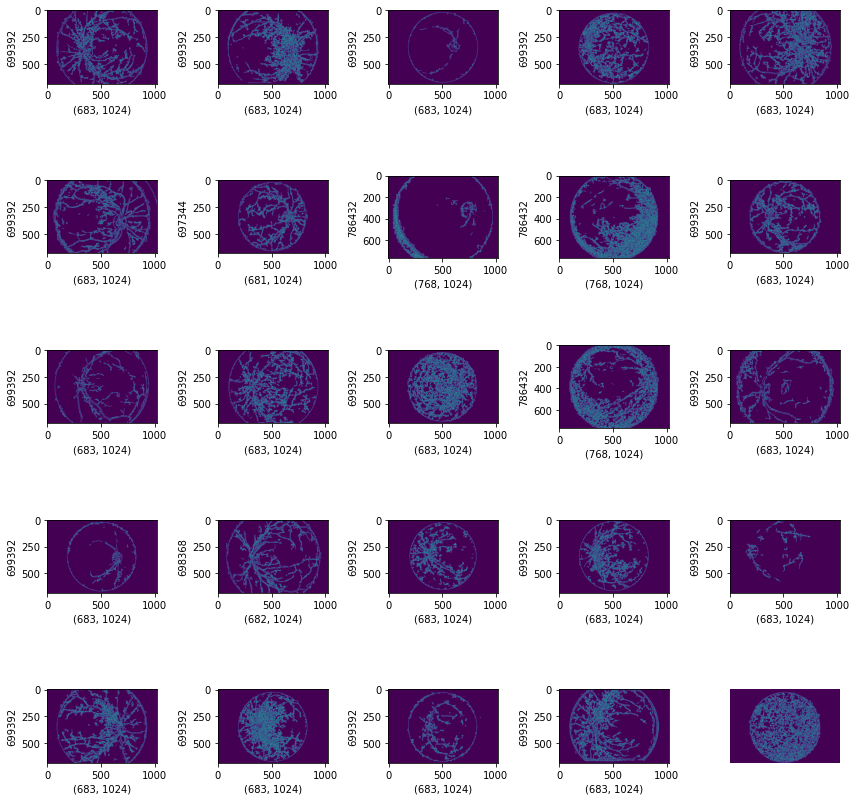

In [11]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    Example_Image = cv2.imread(DR_Path_Series[i])
    Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
    Canny_Image = cv2.Canny(Example_Image,50,8)
    ax.set_xlabel(Canny_Image.shape)
    ax.set_ylabel(Canny_Image.size)
    ax.imshow(Canny_Image)
plt.tight_layout()
plt.axis("off")
plt.show()

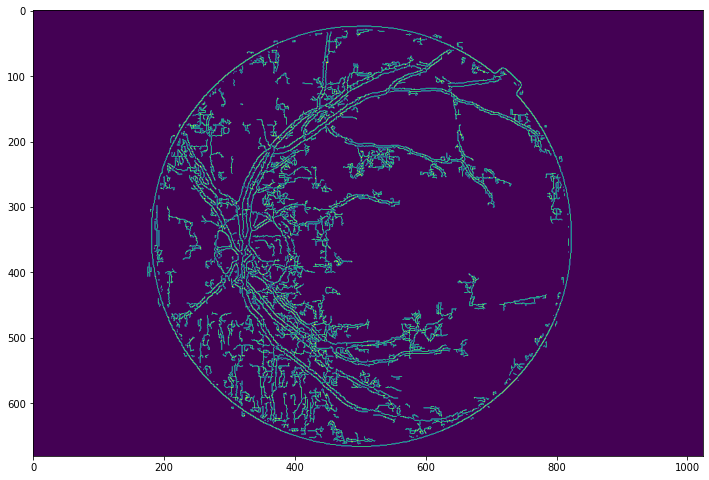

In [12]:
figure = plt.figure(figsize=(12,12))
Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
Canny_Image = cv2.Canny(Example_Image,50,8)

plt.imshow(Canny_Image)

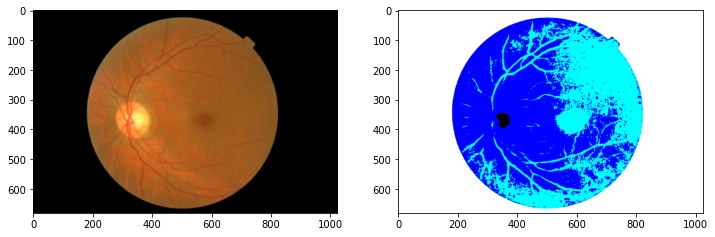

In [13]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

axis[0].imshow(Example_Image)
axis[1].imshow(Threshold_Image)

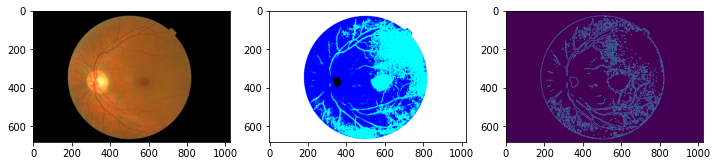

In [14]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2RGB)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)
Canny_Image = cv2.Canny(Threshold_Image,10,8)

axis[0].imshow(Example_Image)
axis[1].imshow(Threshold_Image)
axis[2].imshow(Canny_Image)

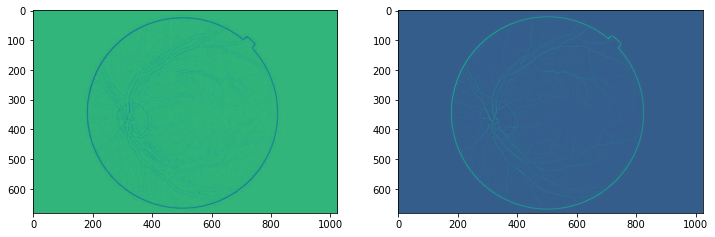

In [15]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=0.15,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[1].imshow(max_S)

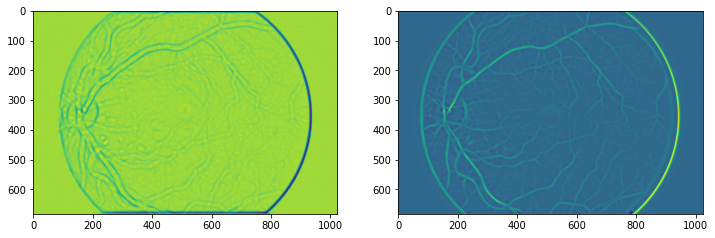

In [16]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[48])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=4,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

axis[0].imshow(min_S)
axis[1].imshow(max_S)

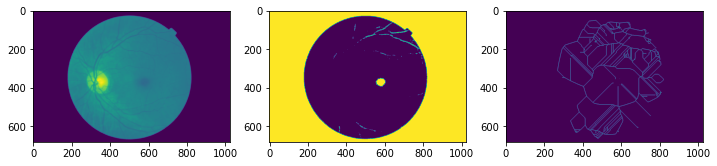

In [17]:
figure,axis = plt.subplots(nrows=1,ncols=3,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

Arr_IMG = np.array(Example_Image > Threshold_Image).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Arr_IMG)

axis[0].imshow(Example_Image)
axis[1].imshow(Threshold_Image)
axis[2].imshow(Skeleton_IMG)

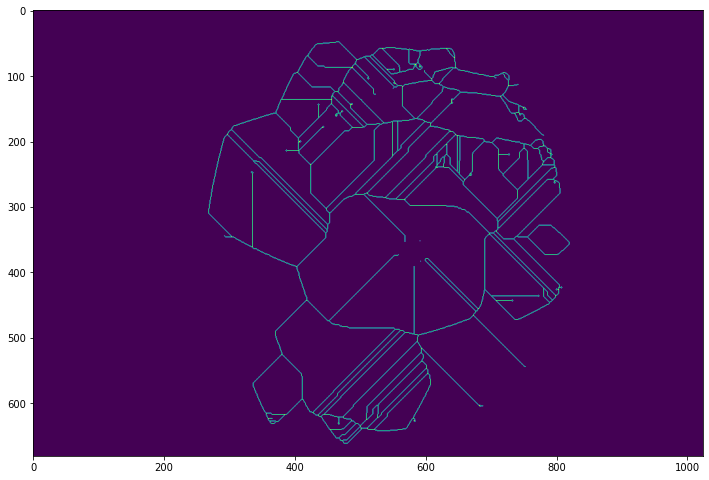

In [18]:
figure = plt.figure(figsize=(12,12))
Example_Image = cv2.imread(DR_Path_Series[4578])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

Arr_IMG = np.array(Example_Image > Threshold_Image).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Arr_IMG)

plt.imshow(Skeleton_IMG)

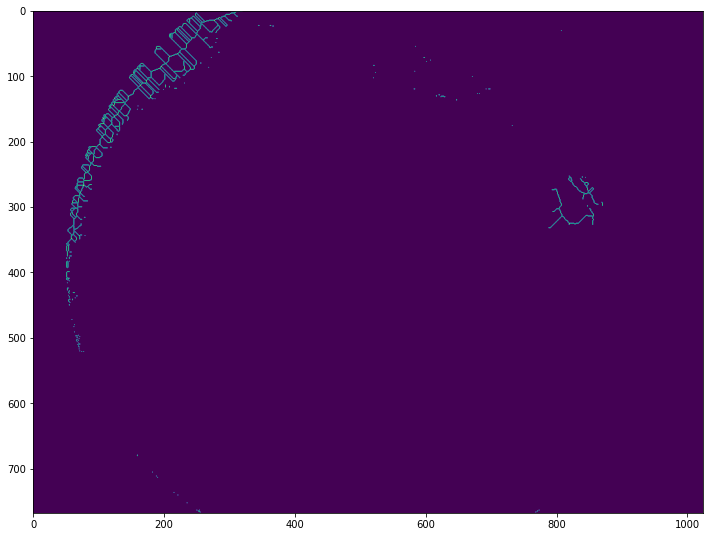

In [19]:
figure = plt.figure(figsize=(12,12))
Example_Image = cv2.imread(DR_Path_Series[2201])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

Arr_IMG = np.array(Example_Image > Threshold_Image).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize_3d(Arr_IMG)

plt.imshow(Skeleton_IMG)

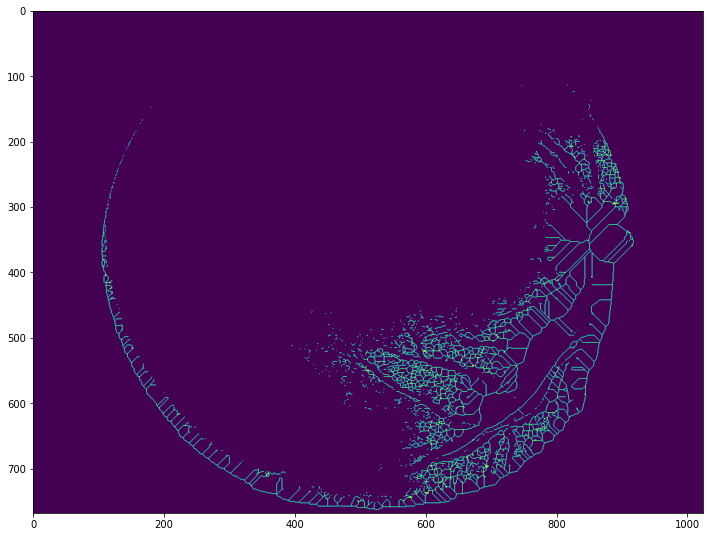

In [20]:
figure = plt.figure(figsize=(12,12))
Example_Image = cv2.imread(DR_Path_Series[8])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)
_,Threshold_Image = cv2.threshold(Example_Image,90,255,cv2.THRESH_BINARY_INV)

Arr_IMG = np.array(Example_Image > Threshold_Image).astype(int)
Skeleton_IMG = skimage.morphology.skeletonize(Arr_IMG)

plt.imshow(Skeleton_IMG)

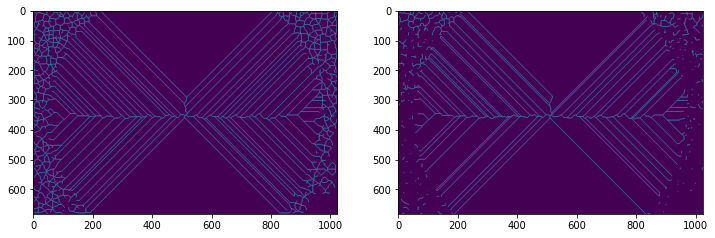

In [21]:
figure,axis = plt.subplots(nrows=1,ncols=2,figsize=(12,12))

Example_Image = cv2.imread(DR_Path_Series[48])
Example_Image = cv2.cvtColor(Example_Image,cv2.COLOR_BGR2GRAY)

Hessian_Mat = hessian_matrix(Example_Image,sigma=4,order="rc")
max_S,min_S = hessian_matrix_eigvals(Hessian_Mat)

Arr_IMG_Min = np.array(Example_Image > min_S).astype(int)
Skeleton_IMG_Min = skimage.morphology.skeletonize(Arr_IMG_Min)

Arr_IMG_Max = np.array(Example_Image > max_S).astype(int)
Skeleton_IMG_Max = skimage.morphology.skeletonize(Arr_IMG_Max)

axis[0].imshow(Skeleton_IMG_Min)
axis[1].imshow(Skeleton_IMG_Max)

# DATA PROCESS

In [22]:
DR_Path_Series = DR_Path_Series[0:6000]

In [23]:
print(DR_Path_Series.head(-1))

0       ../input/diabetic-retinopathy-resized-arranged...
1       ../input/diabetic-retinopathy-resized-arranged...
2       ../input/diabetic-retinopathy-resized-arranged...
3       ../input/diabetic-retinopathy-resized-arranged...
4       ../input/diabetic-retinopathy-resized-arranged...
                              ...                        
5994    ../input/diabetic-retinopathy-resized-arranged...
5995    ../input/diabetic-retinopathy-resized-arranged...
5996    ../input/diabetic-retinopathy-resized-arranged...
5997    ../input/diabetic-retinopathy-resized-arranged...
5998    ../input/diabetic-retinopathy-resized-arranged...
Name: JPEG, Length: 5999, dtype: object


In [24]:
Transformation_Data = []

for pick_IMG in DR_Path_Series:
    IMG_Pick = cv2.imread(pick_IMG)
    IMG_Pick = cv2.cvtColor(IMG_Pick,cv2.COLOR_BGR2RGB)
    IMG_Pick = cv2.resize(IMG_Pick,(180,180))
    IMG_Pick = IMG_Pick / 255.
    Transformation_Data.append(IMG_Pick)

In [25]:
print(Transformation_Data[3].shape)

(180, 180, 3)


In [26]:
Training_Set = np.asarray(Transformation_Data)
Training_Set = Training_Set.reshape(-1,180,180,3)

In [27]:
print(Training_Set.shape)

(6000, 180, 180, 3)


# DC-GAN

#### GENERATOR - DISCRIMINATOR STRUCTURE

In [28]:
Generator_Input = keras.Input(shape=(180,))

x = layers.Dense(128*90*90)(Generator_Input)
x = layers.LeakyReLU()(x)
x = layers.Reshape((90,90,128))(x)

x = layers.Conv2D(256,4,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2DTranspose(256,4,padding="same",strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256,4,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256,3,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(256,3,padding="same")(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(3,7,padding="same",activation="tanh")(x)

In [29]:
Generator = keras.models.Model(Generator_Input,x)

In [30]:
print(Generator.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 180)]             0         
_________________________________________________________________
dense (Dense)                (None, 1036800)           187660800 
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 1036800)           0         
_________________________________________________________________
reshape (Reshape)            (None, 90, 90, 128)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 90, 90, 256)       524544    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 90, 90, 256)       0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 180, 180, 256)     104883

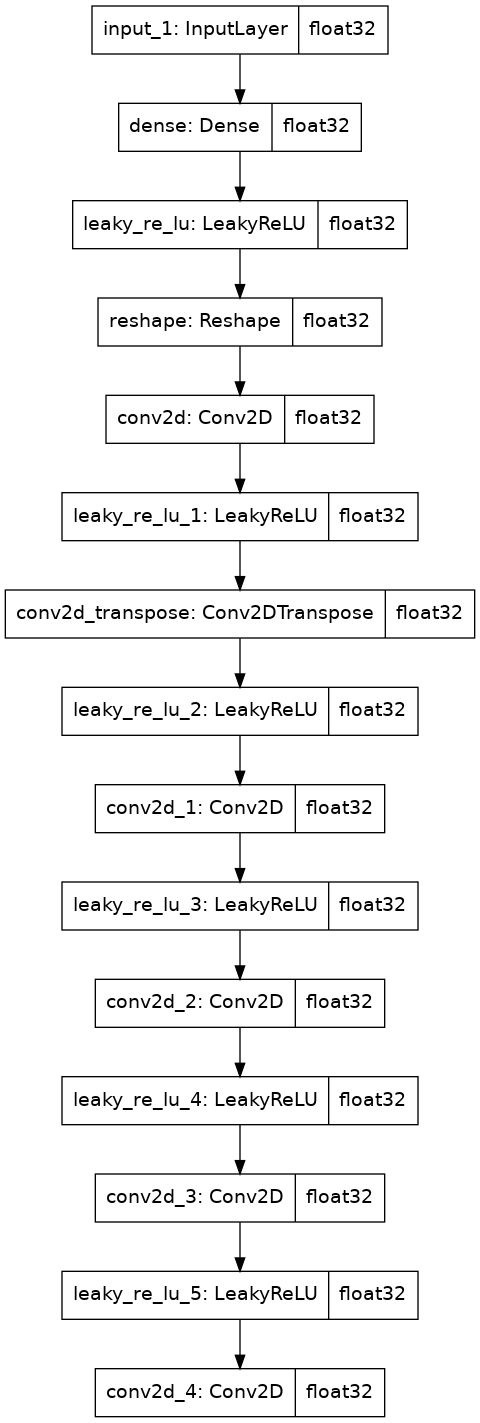

In [31]:
plot_model(Generator,show_dtype=True,show_layer_names=True)

In [32]:
Discriminator_Input = layers.Input(shape=(180,180,3))

x = layers.Conv2D(128,3)(Discriminator_Input)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,4,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Conv2D(128,3,strides=2)(x)
x = layers.LeakyReLU()(x)

x = layers.Flatten()(x)
x = layers.Dense(1,activation="sigmoid")(x)

In [33]:
Discriminator = keras.models.Model(Discriminator_Input,x)

In [34]:
print(Discriminator.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 180, 180, 3)]     0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 178, 178, 128)     3584      
_________________________________________________________________
leaky_re_lu_6 (LeakyReLU)    (None, 178, 178, 128)     0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 88, 88, 128)       262272    
_________________________________________________________________
leaky_re_lu_7 (LeakyReLU)    (None, 88, 88, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 43, 43, 128)       262272    
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 43, 43, 128)       0   

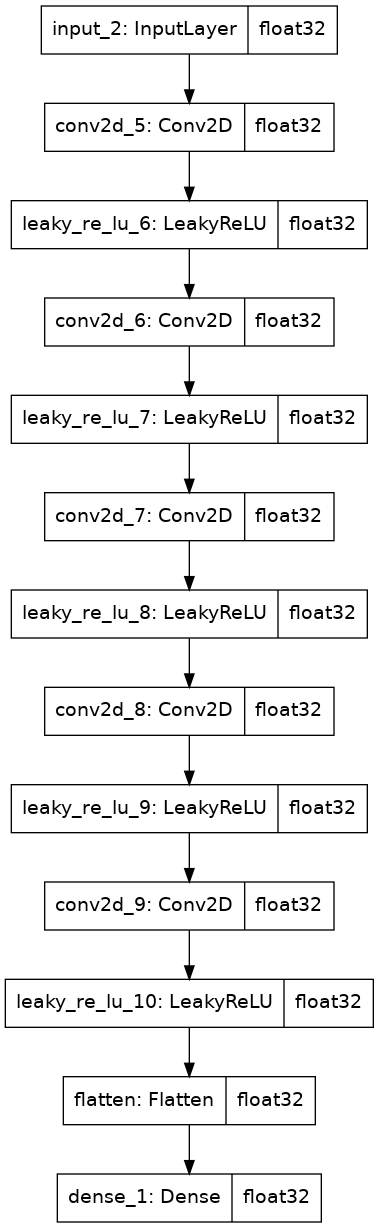

In [35]:
plot_model(Discriminator,show_dtype=True,show_layer_names=True)

In [36]:
Discriminator.compile(optimizer=RMSprop(lr=0.0004,clipvalue=1.0,decay=1e-8),loss="binary_crossentropy")

In [37]:
Discriminator.trainable = False

In [38]:
GAN_Input = keras.Input(shape=(180,))
GAN_Output = Discriminator(Generator(GAN_Input))

In [39]:
GAN_Model = keras.models.Model(GAN_Input,GAN_Output)

In [40]:
GAN_Model.compile(optimizer=RMSprop(lr=0.0004,clipvalue=1.0,decay=1e-8),loss="binary_crossentropy")

In [41]:
print(GAN_Model.summary())

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 180)]             0         
_________________________________________________________________
model (Functional)           (None, 180, 180, 3)       191500803 
_________________________________________________________________
model_1 (Functional)         (None, 1)                 948353    
Total params: 192,449,156
Trainable params: 191,500,803
Non-trainable params: 948,353
_________________________________________________________________
None


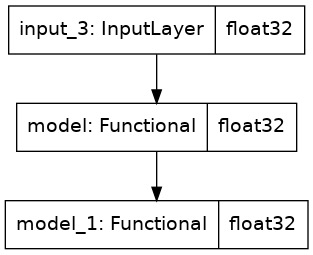

In [42]:
plot_model(GAN_Model,show_dtype=True,show_layer_names=True)

#### SAVING PATH

In [46]:
os.mkdir("NEW1_IRIS_PIC")

#### TRAINING

In [47]:
start_period = 0
batch_size = 32
dim_size = 180
iterations = 3000

In [3]:
for step in range(iterations):
    random_noise_vector = np.random.normal(size=(batch_size,dim_size))
    Generator_Iris = Generator.predict(random_noise_vector)
    
    stop = start_period + batch_size
    
    Real_Iris = Training_Set[start_period:stop]
    
    Combinated_Iris = np.concatenate([Generator_Iris,Real_Iris])
    
    labels = np.concatenate([np.ones((batch_size,1)),np.zeros((batch_size,1))])
    labels = labels + 0.05 * np.random.random(labels.shape)
    
    Discriminator_Loss = Discriminator.train_on_batch(Combinated_Iris,labels)
    
    random_noise_vector = np.random.normal(size=(batch_size,dim_size))
    
    misleading_vector = np.zeros((batch_size,1))
    
    Adversarial_Loss = GAN_Model.train_on_batch(random_noise_vector,misleading_vector)
    
    start_period = start_period + batch_size
    
    if start_period > len(Training_Set) - batch_size:
        start_period = 0
    if step % 5 == 0:
        GAN_Model.save_weights("DCGAN_M_Weights.h5")
        
        print("DISCRIMINATOR LOSS: ", "%.3f" % Discriminator_Loss)
        print("ADVERSARIAL LOSS: ", "%.3f" % Adversarial_Loss)
        
        Img_X_X = image.array_to_img(Generator_Iris[0] * 255., scale=False)
        Img_X_X.save(os.path.join("./NEW_IRIS_PIC","FAKE" + str(step)+".png"))
        
        Img_X_X = image.array_to_img(Real_Iris[0] * 255.,scale=False)
        Img_X_X.save(os.path.join("./NEW_IRIS_PIC","REAL"+str(step)+".png"))
        
GAN_Model.save("GAN_MAIN.h5")
print("SUCCESS")

NameError: name 'iterations' is not defined

#### PREDICTION

In [ ]:
Random_New_Noise = tf.random.normal(shape=[30,dim_size])

In [ ]:
plt.imshow(Random_New_Noise)

In [ ]:
Generator_Prediction_Iris = Generator(Random_New_Noise)

In [ ]:
figure,axis = plt.subplots(nrows=5,ncols=5,figsize=(12,12))

for i,ax in enumerate(axis.flat):
    IMG_Predict = Generator_Prediction_Iris[i]
    ax.imshow(IMG_Predict)
    ax.set_xlabel(IMG_Predict.shape)
plt.tight_layout()
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(Generator_Prediction_Iris[7])
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(Generator_Prediction_Iris[5])
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(Generator_Prediction_Iris[28])
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(Generator_Prediction_Iris[1])
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(Generator_Prediction_Iris[18])
plt.show()

In [ ]:
Output_IMG = Path("./NEW_IRIS_PIC")
List_Output_IMG = list(Output_IMG.glob(r"*.png"))
List_Output_IMG_Series = pd.Series(List_Output_IMG,name="PNG").astype(str)

In [ ]:
figure, axes = plt.subplots(nrows=7,ncols=7,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    List_Gen_Image = cv2.imread(List_Output_IMG_Series[i])
    List_Gen_Image = cv2.cvtColor(List_Gen_Image,cv2.COLOR_BGR2RGB)
    ax.imshow(List_Gen_Image,cmap="binary")
    ax.set_xlabel(List_Gen_Image.shape)
    ax.set_ylabel(List_Gen_Image.size)
plt.tight_layout()
plt.show()

In [ ]:
def splitting_text(main_path,path_list,labels_list):
    
    for image in main_path:
        ID_Path,document_type = os.path.splitext(image)
        main_path,type_iris = ID_Path.split("/")
        path_list.append(image)
        labels_list.append(type_iris[0:4])

In [ ]:
Path_PNG_List = []
Labels_PNG_List = []

In [ ]:
splitting_text(List_Output_IMG,Path_PNG_List,Labels_PNG_List)

In [ ]:
print(Path_PNG_List[0:3])

In [ ]:
print(Labels_PNG_List[0:3])

In [ ]:
Path_PNG_Series = pd.Series(Path_PNG_List,name="PNG").astype(str)
Labels_PNG_Series = pd.Series(Labels_PNG_List,name="CATEGORY")
Main_Total_Data = pd.concat([Path_PNG_Series,Labels_PNG_Series],axis=1)

In [ ]:
print(Main_Total_Data.head(-1))

In [ ]:
Fake_Iris = Main_Total_Data[Main_Total_Data["CATEGORY"] == "FAKE"]
Fake_Iris = Fake_Iris.reset_index()

In [ ]:
figure, axes = plt.subplots(nrows=6,ncols=6,figsize=(10,10))

for i,ax in enumerate(axes.flat):
    List_Gen_Image = cv2.imread(Fake_Iris["PNG"][i])
    List_Gen_Image = cv2.cvtColor(List_Gen_Image,cv2.COLOR_BGR2RGB)
    ax.imshow(List_Gen_Image,cmap="binary")
    ax.set_xlabel(List_Gen_Image.shape)
    ax.set_ylabel(List_Gen_Image.size)
plt.tight_layout()
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][5]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][8]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][10]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][23]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()

In [ ]:
figure = plt.figure(figsize=(7,7))
IMG_Fake = Fake_Iris["PNG"][30]
Fake_Iris_Img = cv2.imread(IMG_Fake)
Fake_Iris_Img = cv2.cvtColor(Fake_Iris_Img,cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.imshow(Fake_Iris_Img)
plt.show()